### Importando as Bibliotecas

In [230]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly_express as px
import matplotlib.pyplot as plt

# Infos do DF




1. ID number
2. Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:
* a) radius (mean of distances from center to points on the perimeter)
* b) texture (standard deviation of gray-scale values)
* c) perimeter
* d) area
* e) smoothness (local variation in radius lengths)
* f) compactness (perimeter^2 / area - 1.0)
* g) concavity (severity of concave portions of the contour)
* h) concave points (number of concave portions of the contour)
* i) symmetry
* j) fractal dimension ("coastline approximation" - 1)

+ Média (mean): A média dos valores de uma característica em particular.
+ Erro padrão (standard error, SE): Uma medida da variabilidade ou dispersão dos dados em torno da média.
+ Pior valor ("worst" ou largest): A média dos três maiores valores dessa característica.

In [231]:
dfOriginal = pd.read_csv("data_cancer2.csv", sep=",")
df  = pd.DataFrame.copy(dfOriginal)

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [233]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [234]:
df['Unnamed: 32']
df.nunique()
df.drop(columns='Unnamed: 32', inplace=True)

<p> Deixando a variavel de Diagnostico como Binário </p>

In [235]:
df['diagnosis'] = np.where(df['diagnosis'] == 'M', 1, 0)

In [236]:
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [237]:
df.drop(columns='id', inplace=True)

In [238]:
mean_columns = df.columns[df.columns.str.contains("mean")]
se_columns = df.columns[df.columns.str.contains("_se")]
worst_columns = df.columns[df.columns.str.contains("_worst")]


# Inicio da Analise Exploratória

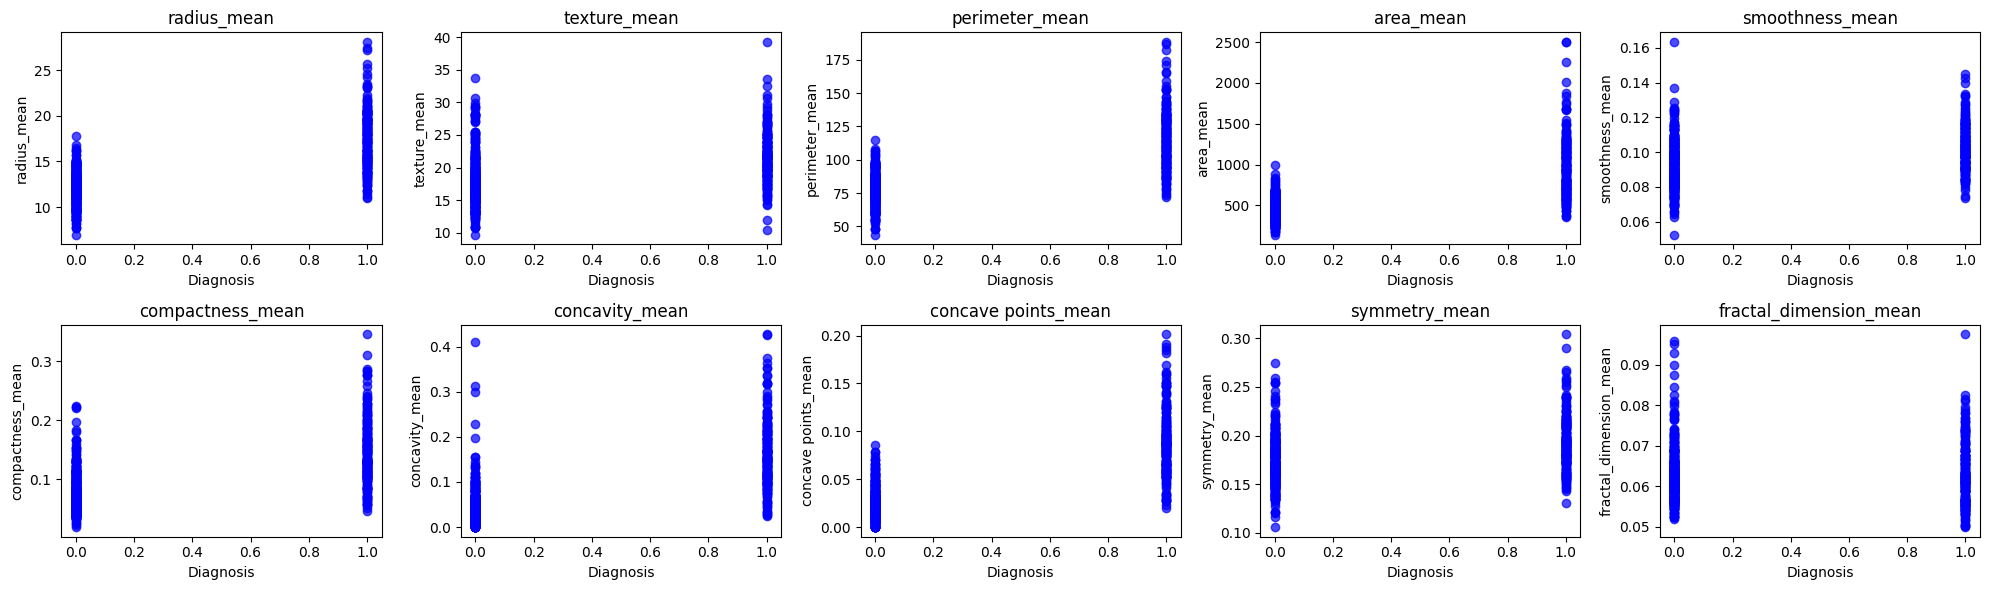

In [239]:

fig, axes = plt.subplots(2, 5, figsize=(20, 6))
axes = axes.flatten()
for i, coluna in enumerate(mean_columns):
    axes[i].scatter(y=df[coluna], x=df['diagnosis'], color='blue', alpha=0.7)
    axes[i].set_title(coluna)
    axes[i].set_ylabel(coluna)
    axes[i].set_xlabel('Diagnosis')
plt.tight_layout()
plt.show()


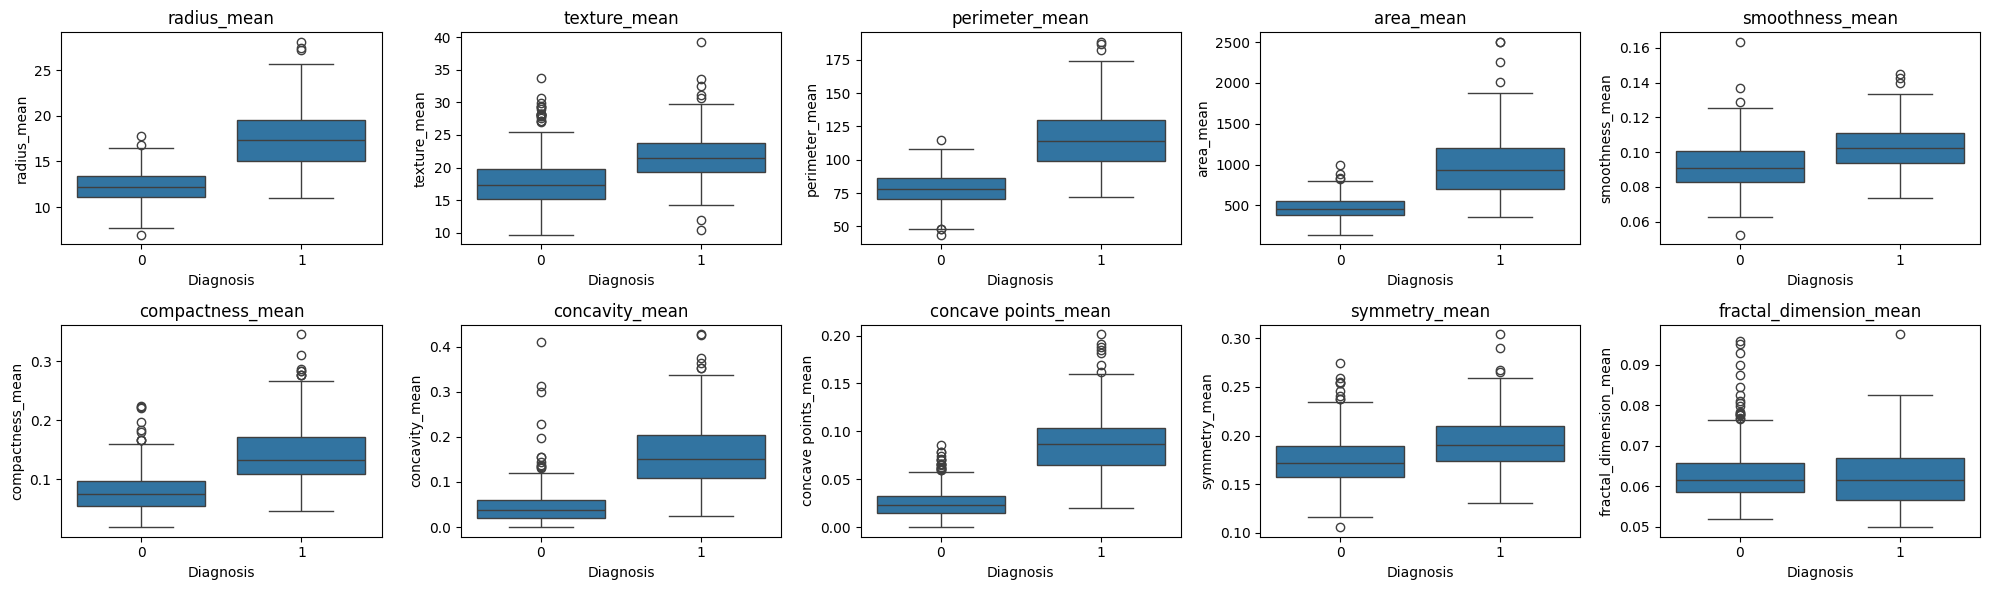

In [240]:
fig, axes = plt.subplots(2, 5, figsize=(20, 6))
axes = axes.flatten()
for i, coluna in enumerate(mean_columns):
    sns.boxplot(data=df ,  y= df[coluna],  x= df['diagnosis'] , ax=axes[i])
    axes[i].set_title(coluna)
    axes[i].set_ylabel(coluna)
    axes[i].set_xlabel('Diagnosis')
plt.tight_layout()
plt.show()

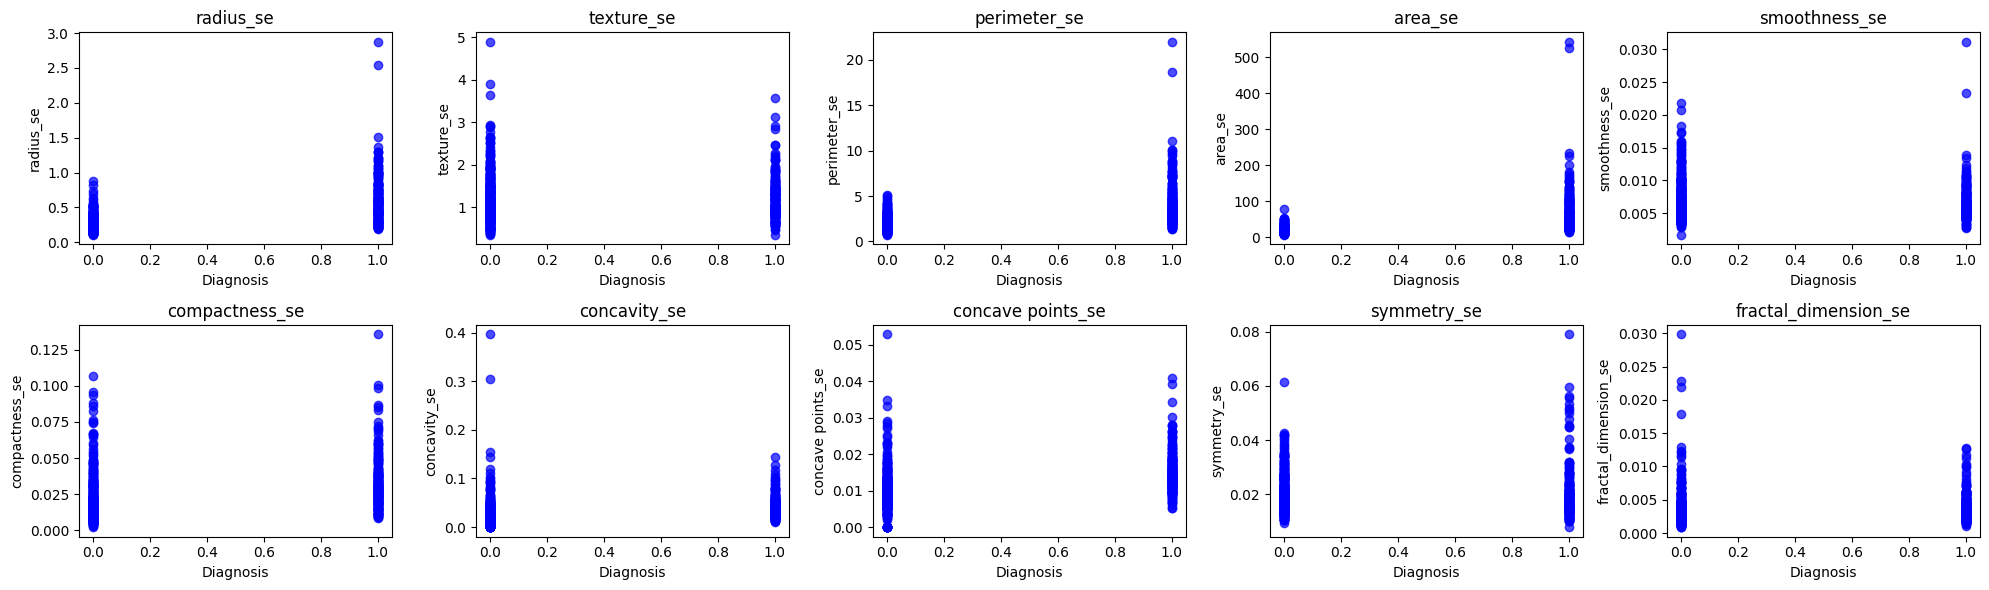

In [241]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 5, figsize=(20, 6))
axes = axes.flatten()
for i, coluna in enumerate(se_columns):
    axes[i].scatter(y=df[coluna], x=df['diagnosis'], color='blue', alpha=0.7)
    axes[i].set_title(coluna)
    axes[i].set_ylabel(coluna)
    axes[i].set_xlabel('Diagnosis')
plt.tight_layout()
plt.show()


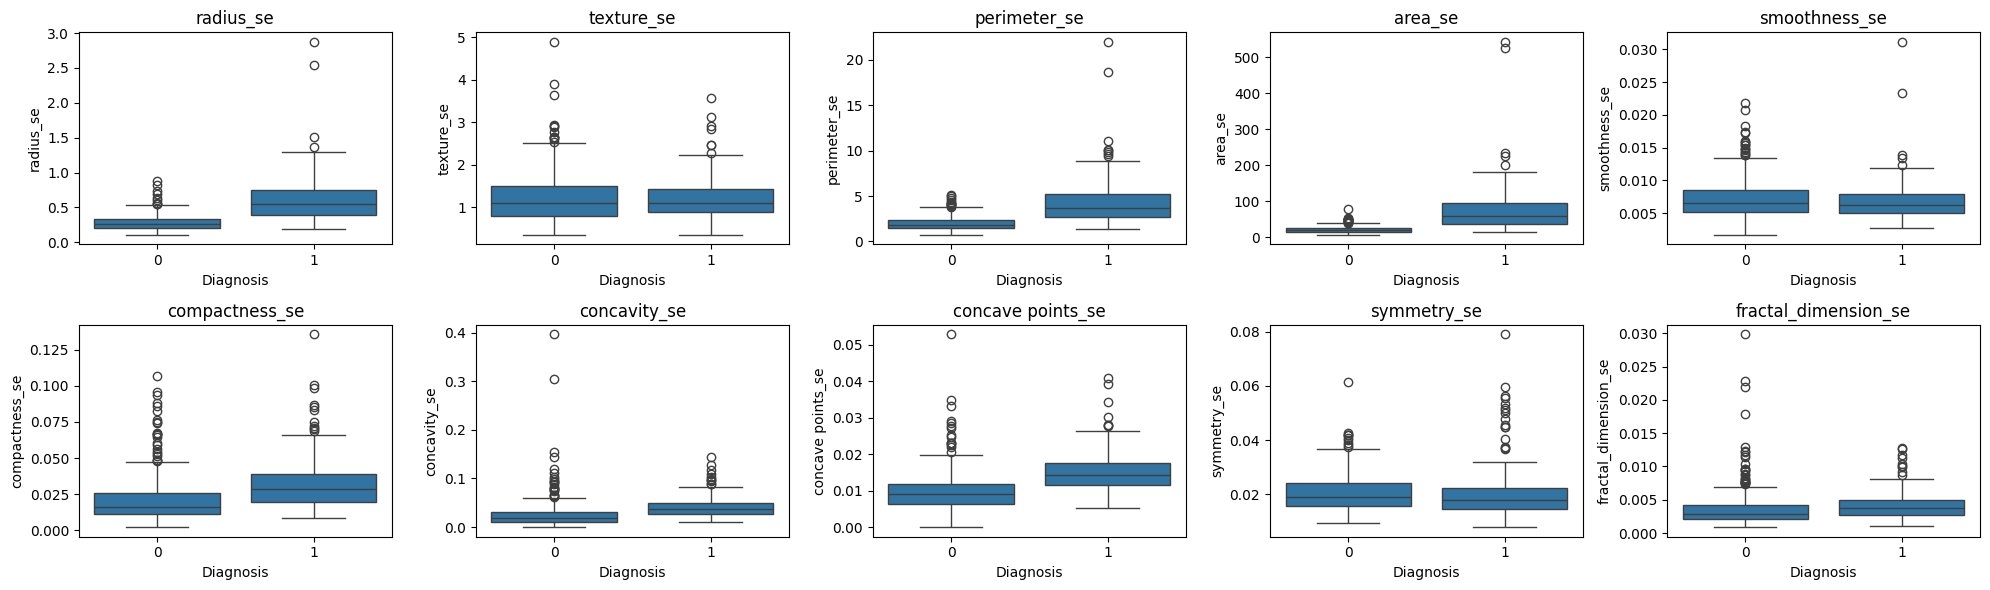

In [242]:
fig, axes = plt.subplots(2, 5, figsize=(20, 6))
axes = axes.flatten()
for i, coluna in enumerate(se_columns):
    sns.boxplot(data=df ,  y= df[coluna],  x= df['diagnosis'] , ax=axes[i])
    axes[i].set_title(coluna)
    axes[i].set_ylabel(coluna)
    axes[i].set_xlabel('Diagnosis')
plt.tight_layout()
plt.show()

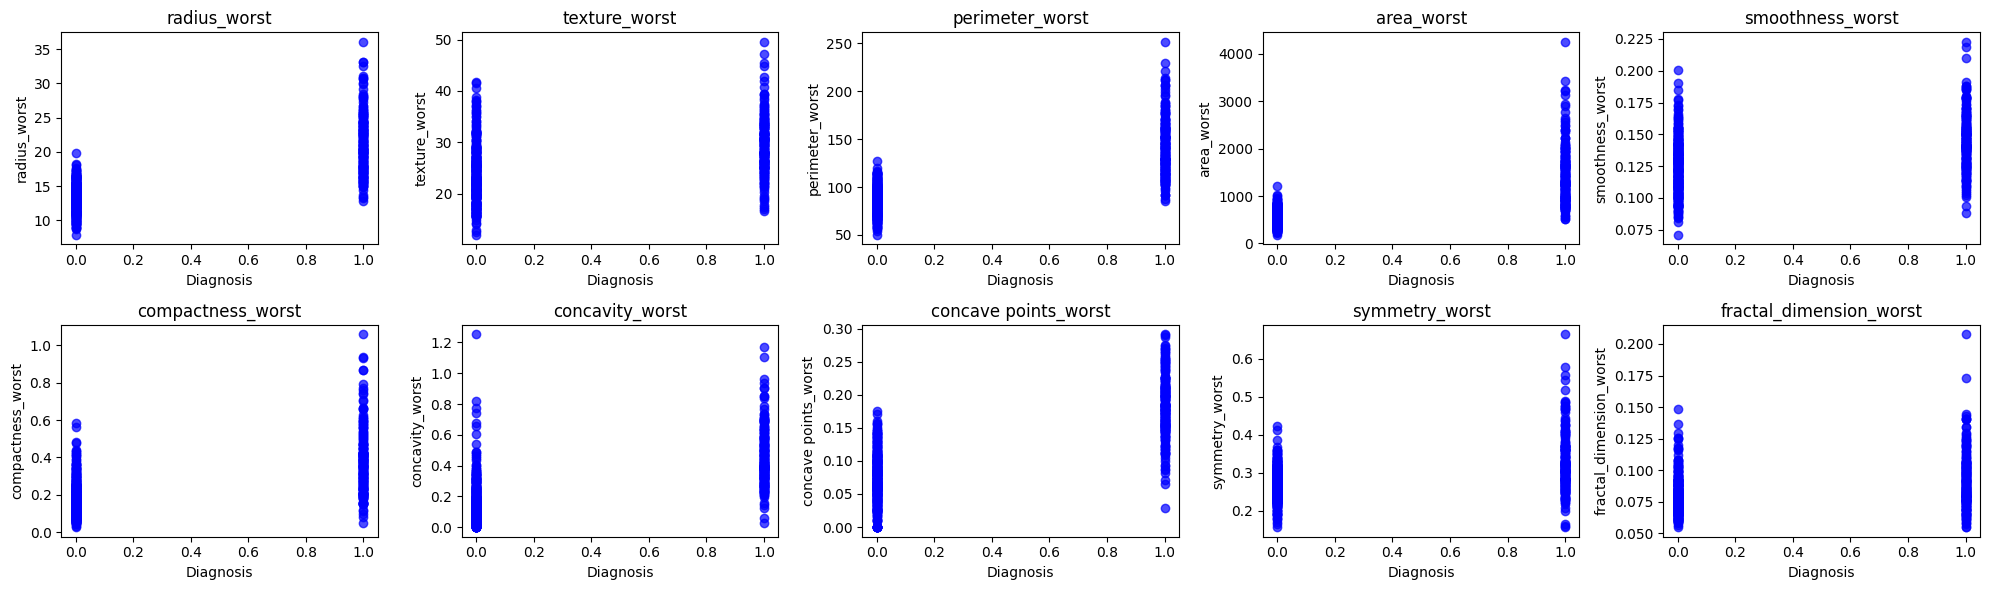

In [243]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 5, figsize=(20, 6))
axes = axes.flatten()
for i, coluna in enumerate(worst_columns):
    axes[i].scatter(y=df[coluna], x=df['diagnosis'], color='blue', alpha=0.7)
    axes[i].set_title(coluna)
    axes[i].set_ylabel(coluna)
    axes[i].set_xlabel('Diagnosis')
plt.tight_layout()
plt.show()


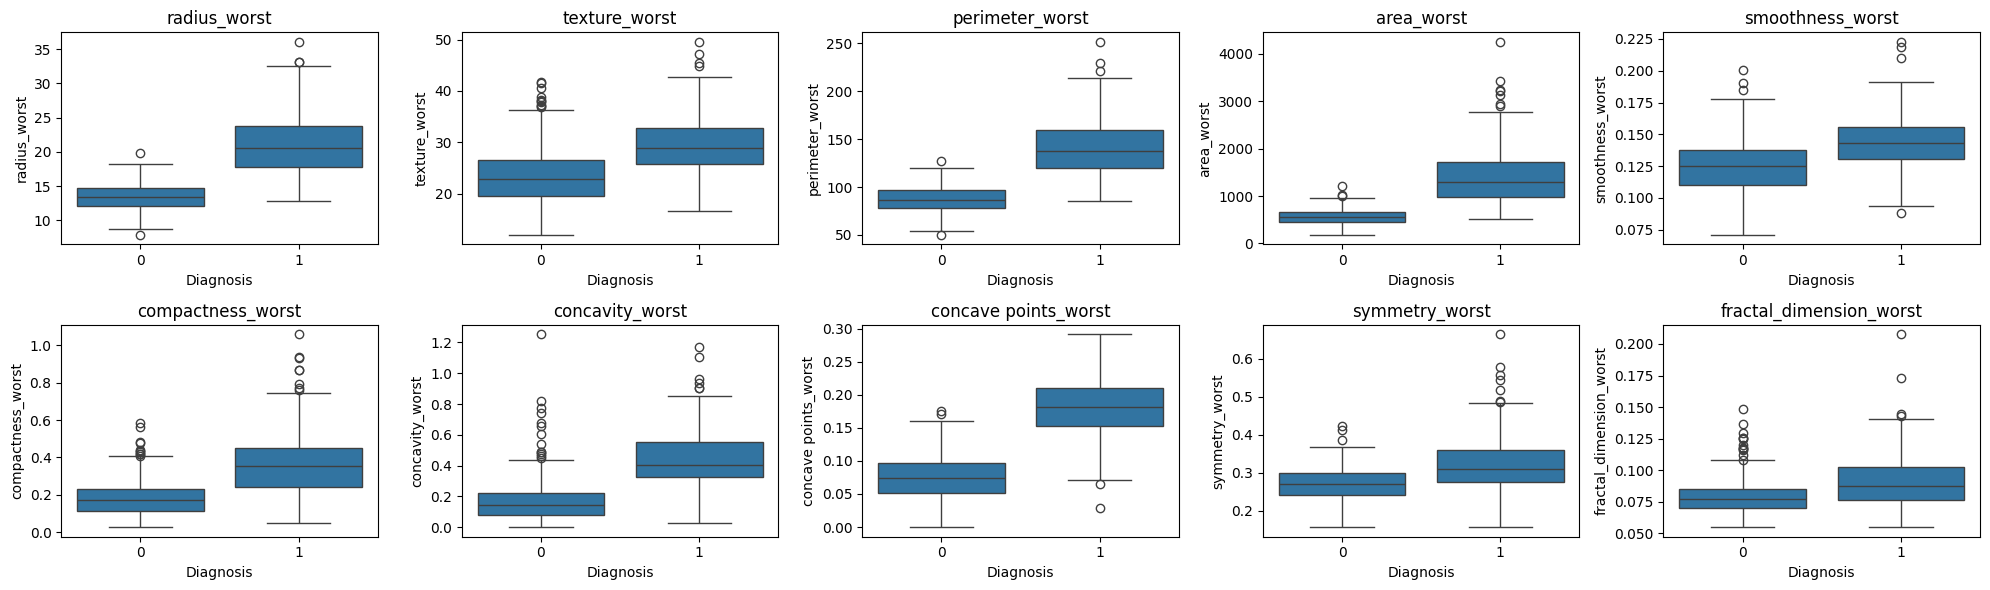

In [244]:
fig, axes = plt.subplots(2, 5, figsize=(20, 6))
axes = axes.flatten()
for i, coluna in enumerate(worst_columns):
    sns.boxplot(data=df ,  y= df[coluna],  x= df['diagnosis'] , ax=axes[i])
    axes[i].set_title(coluna)
    axes[i].set_ylabel(coluna)
    axes[i].set_xlabel('Diagnosis')
plt.tight_layout()
plt.show()

<p>Analisando a distribuição de todas as variaveis, as que apresentam ter uma maior dispersao entre si ( ou seja, aquelas que podem ser separadas com maior facilidade ) aparentam ser:</p>

* radius mean
* perimeter mean
* area mean
* concavity mean
* compactness_mean
* concave points mean
* radius_ se
* perimeter_se
* area_se
* radius worts
* perimeter worst
* area worst
* concavity_wortst
* concave points worst

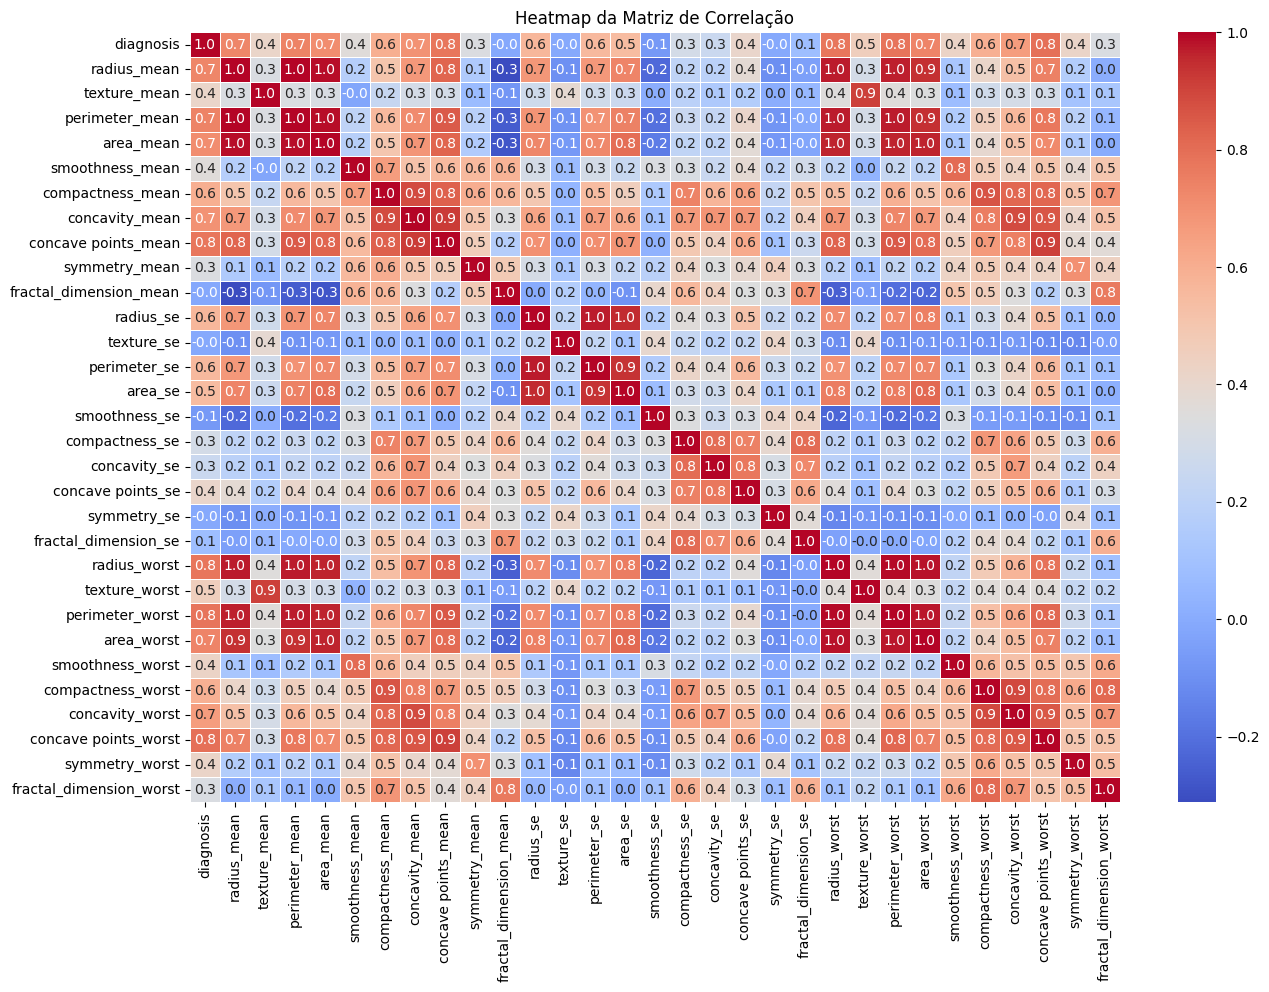

In [245]:
correlation_matrix = df.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".1f", cbar=True, linewidths=.5 ,ax=ax)
plt.title("Heatmap da Matriz de Correlação")
plt.show()


<p>Analisando as variaveis anteriormente ditas com suas correlações entre si, resolvi escolher as seguintes:</p>

* radius mean
* perimeter mean
* area mean
* compactness_mean
* area_se
* concavity_worst 
* concave points worst

# Machine Learning - Objetivo : Prever o Diagnóstico

In [246]:
x = df[['radius_mean', 'perimeter_mean', 'area_mean','compactness_mean', 'area_se', 'concavity_worst','concave points_worst']]
y = df['diagnosis']

In [247]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=30)      
clr_rf = clf_rf.fit(x_train,y_train)
previsoes = clf_rf.predict(x_test)
ac = accuracy_score(y_test,previsoes)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,previsoes)
print(cm)
print(classification_report(y_test, previsoes))

Accuracy is:  0.9239766081871345
[[99  3]
 [10 59]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       102
           1       0.95      0.86      0.90        69

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



<p>Pode-se perceber que a precisão e o Recall estão muito bons, principalmente levando em consideração o Recall por se tratar de uma previsão relacionada a Cancer, já que por exemplo 97% das previsões realmente não tinham cancer e 86% realmente tinham.</p>


<h3>Agora, vamos verificar se a escolha das variáveis foram as melhores, utilizando de algumas ferramentas</h3>


<p>1°  Feature Importance</p>

In [248]:
features = dict(zip(clr_rf.feature_importances_, clr_rf.feature_names_in_))
features

{0.14215402389875836: 'radius_mean',
 0.18256517082859655: 'perimeter_mean',
 0.13826442331671862: 'area_mean',
 0.033686139508397606: 'compactness_mean',
 0.10630781105045453: 'area_se',
 0.11088700262380852: 'concavity_worst',
 0.28613542877326587: 'concave points_worst'}

In [249]:
x_ = df.iloc[:,1:]
y_ = df['diagnosis']

rf_ = RandomForestClassifier(random_state=30)      
rf_ = clf_rf.fit(x_,y_)

features_ = dict(zip(rf_.feature_names_in_, rf_.feature_importances_))

features_importance = pd.DataFrame(list(features_.items())).sort_values(by=1, ascending=False)
features_importance.head(10)


,0,1
23,area_worst,0.151843
22,perimeter_worst,0.151214
27,concave points_worst,0.117699
7,concave points_mean,0.088730
20,radius_worst,0.085305
6,concavity_mean,0.067328
3,area_mean,0.059088
13,area_se,0.037608
2,perimeter_mean,0.025419
26,concavity_worst,0.022105


<p>Relembrando as variaveis escolhidas</p>

* radius mean  -   Não esta no top 10 
* <b>perimeter mean -  Está no top 10</b>
* <b>area mean -   Está no top 10</b>
* compactness_mean - Não está no top 10
* <b>area_se -  Está no top 10</b>
* <b>concavity_worst -  Está no top 10</b>
* <b>concave points worst - Está no top 10</b>

<p>2° RFE</p>

In [250]:
from sklearn.feature_selection import RFE

estimator = RandomForestClassifier(random_state=30)
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(x_, y_)

In [251]:
selector.get_support(indices=True)
x_.iloc[:, selector.get_support(indices=True)].columns

Index(['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

<p>Relembrando as variaveis escolhidas</p>

* radius mean  -   Não esta no top 10 
* <b>perimeter mean -  Está no top 10 </b>
* <b>area mean -   Está no top 10 </b>
* compactness_mean - Não está no top 10
* area_se -  Não Está no top 10
* <b>concavity_worst -  Está no top 10 </b>
* <b>concave points worst- Está no top 10 </b>

<p>3° SelectKBest</p>

In [252]:
from sklearn.feature_selection import SelectKBest, f_classif
# select top 2 features using f_classif
selector = SelectKBest(f_classif, k=10)
features_Kbest = selector.fit(x_, y_)

x_.iloc[:, features_Kbest.get_support(indices=True)].columns

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

<p>Relembrando as variaveis escolhidas</p>

* <b>radius mean  -   Está no top 10 </b> 
* <b>perimeter mean -  Está no top 10 </b>
* <b>area mean -   Está no top 10 </b>
* compactness_mean - Não está no top 10
* area_se -  Não Está no top 10
* <b>concavity_worst -  Está no top 10 </b>
* <b>concave points worst- Está no top 10 </b>

<p>Vamos Remover Compactness_mean,area_se e Radius Mean ocasionadas pelo baixo ou nenhum numero de ocorrencias nos scripts de seleção de variáveis e iremos adicionar outras 3 que apareceram com maior frequencia</p>

Novas Variaveis:

* <b>radius mean</b> 
* <b>perimeter mean</b>
* <b>area mean</b>
* <b>Area Worst</b>
* <b>Perimeter Worst</b>
* <b>concavity_worst</b>
* <b>concave points worst</b>
* <b>Concave points mean</b>

<p>Teste do modelo com as novas variaveis </p>

In [253]:
x_2  = df[['radius_mean','perimeter_mean','area_mean','area_worst','perimeter_worst','concavity_worst','concave points_worst','concave points_mean']] 

x_train, x_test, y_train, y_test = train_test_split(x_2, y, test_size=0.3, random_state=100)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=30)      
clr_rf = clf_rf.fit(x_train,y_train)
previsoes = clf_rf.predict(x_test)
ac = accuracy_score(y_test,previsoes)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,previsoes)
print(cm)
print(classification_report(y_test, previsoes))

Accuracy is:  0.9415204678362573
[[100   2]
 [  8  61]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       102
           1       0.97      0.88      0.92        69

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



<p>Aumento de 0.02 na precisão de 0 e 1</p>
<p>Aumento de 0.01 no recall de 0 e de 0.02 no recall de 1 </p>


### OTIMIZAÇÃO DE HIPERPARAMETROS E PRE PROCESSAMENTO DE VARIAVEIS   

In [254]:
from sklearn.preprocessing import StandardScaler

In [255]:
x_train, x_test, y_train, y_test =  train_test_split(x_2, y,test_size=0.3, random_state=100)

<p> Ecalonamento Padrão para os Dados </p>

In [256]:
x_test_esc = StandardScaler().fit_transform(x_test)

<p> Numero de Arvores 100 , Criterio Entropia e Maxima Profundidade de 3 foram os melhores hiperparametros </p>

In [257]:
clf_rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=30, max_depth=3)

In [258]:
clf_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, random_state=30)

In [259]:
previsoes_1 =  clf_rf.predict(x_test)
previsoes_1_prob = clf_rf.predict_proba(x_test)
print(accuracy_score(y_test , previsoes_1))
print(confusion_matrix(y_test, previsoes_1))
print(classification_report(y_test, previsoes_1))

0.9532163742690059
[[99  3]
 [ 5 64]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       102
           1       0.96      0.93      0.94        69

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [260]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, previsoes_1_prob[:, 1])  
print(f"AUC: {auc}")

AUC: 0.9919011082693947


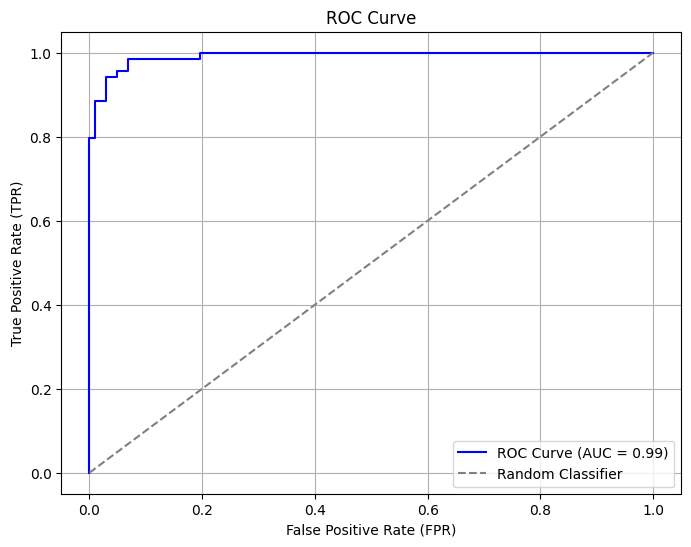

In [261]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, previsoes_1_prob[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


# Teste Dados Escalonados

In [ ]:
previsoes_2 =  clf_rf.predict(x_test_esc)

In [263]:
print(accuracy_score(y_test , previsoes_2))
print(confusion_matrix(y_test, previsoes_2))
print(classification_report(y_test, previsoes_2))

0.847953216374269
[[99  3]
 [23 46]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       102
           1       0.94      0.67      0.78        69

    accuracy                           0.85       171
   macro avg       0.88      0.82      0.83       171
weighted avg       0.86      0.85      0.84       171



<p>Dados escalonados nao demonstraram uma boa eficacia, Utilização descartada </p>

# Validação  Treino - Teste

In [264]:
previsoes_1_treino =  clf_rf.predict(x_train)
previsoes_1_treino_prob = clf_rf.predict_proba(x_train)
print(accuracy_score(y_train , previsoes_1_treino))
print(confusion_matrix(y_train, previsoes_1_treino))
print(classification_report(y_train, previsoes_1_treino))

0.9723618090452262
[[253   2]
 [  9 134]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       255
           1       0.99      0.94      0.96       143

    accuracy                           0.97       398
   macro avg       0.98      0.96      0.97       398
weighted avg       0.97      0.97      0.97       398



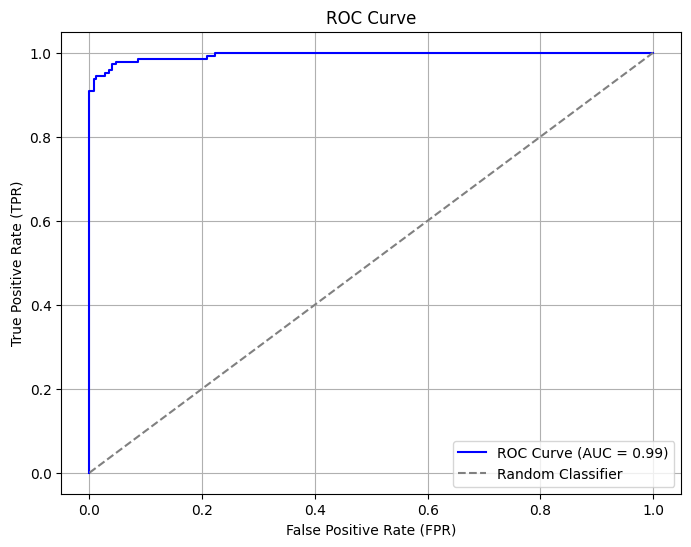

In [265]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, previsoes_1_treino_prob[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


In [266]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [267]:
modelo = RandomForestClassifier()
resultado = cross_val_score(modelo, x_2, y, cv = kfold)
resultado_roc = cross_val_score(modelo, x_2, y, cv = kfold, scoring='roc_auc')

print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))
print("Roc Auc Média: %.2f%%" % (resultado_roc.mean() * 100.0))

Acurácia Média: 95.07%
Roc Auc Média: 98.90%


# Automatização da Otimização de Hiperparametros

In [268]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(n_estimators = [20,50,100,250],criterion=['entropy','gini','log_loss'],max_depth=[1,2,3,4,5]
)
modelo = RandomForestClassifier(random_state=100)

In [269]:
grid_search = GridSearchCV(modelo, param_grid, scoring='roc_auc', cv=4)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=100),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [20, 50, 100, 250]},
             scoring='roc_auc')

In [270]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 250}

<p> Validando Hiperparametros </p>

<p><b> Lembrando que estes hipersparametros sao os melhores para obter o melhor ROC  AUC  </b></p>

In [271]:
x_train, x_test, y_train, y_test =  train_test_split(x_2, y,test_size=0.3, random_state=100)

In [272]:
clf_rf = RandomForestClassifier(n_estimators=250, criterion='entropy', random_state=30, max_depth=5)
clf_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=250,
                       random_state=30)

In [275]:
previsoes =  clf_rf.predict(x_test)
previsoes_prob = clf_rf.predict_proba(x_test)
print(accuracy_score(y_test , previsoes))
print(confusion_matrix(y_test, previsoes))
print(classification_report(y_test, previsoes))
auc = roc_auc_score(y_test, previsoes_prob[:, 1])  
print(f"AUC: {auc}")

0.9473684210526315
[[100   2]
 [  7  62]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       102
           1       0.97      0.90      0.93        69

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

AUC: 0.992895709008241


In [277]:
previsoes_treino =  clf_rf.predict(x_train)
previsoes_treino_prob = clf_rf.predict_proba(x_train)
print(accuracy_score(y_train , previsoes_treino))
print(confusion_matrix(y_train, previsoes_treino))
print(classification_report(y_train, previsoes_treino))
auc = roc_auc_score(y_train, previsoes_treino_prob[:, 1])  
print(f"AUC: {auc}")

0.9874371859296482
[[255   0]
 [  5 138]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       255
           1       1.00      0.97      0.98       143

    accuracy                           0.99       398
   macro avg       0.99      0.98      0.99       398
weighted avg       0.99      0.99      0.99       398

AUC: 0.9996709173179762
